<a href="https://colab.research.google.com/github/amelia188/Walkers-Data-Analysis/blob/master/soil_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis for Soil Quality Report 2023

### Goals of the Analysis
1. Compare the soil nutrients and other variables between the two years and the managed and unmanaged sites.
2. Generate visualizations to highlight these comparisons.
3. Discuss the results, focusing on how different soil nutrients interact and can hinder or help plant growth, nutrient transport, and mobility.
4. Consider the seasonal differences in the interpretation.
5. Identify limitations and suggest improvements based on the findings.
6. Conclude with key takeaways.



In [ ]:
# @title
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the combined dataset
combined_data = pd.read_csv('/content/soil quality data/combined_2022_2023_data_updated.csv')

# Combine "Belleplaine" and "Belleplaine Forest" into a single site
combined_data['Sample Sites'] = combined_data['Sample Sites'].replace({'Belleplaine': 'Belleplaine Forest'})

combined_data.head()
combined_data.to_csv('combined_data.csv', index=False)



Approach for Handling 'Over-range' Values:
For each nutrient column, I attempted to replace 'over-range' values with the highest numeric value found in that column. This is a standard approach for handling censored data, especially when the exact values above a certain threshold are not available.


Boxplots are commonly used for visualizing the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. They are particularly useful for identifying outliers and understanding the spread and skewness of your data. However, their utility can be limited when the dataset is small, as it's harder to establish a meaningful distribution with fewer data points.

### Why Boxplots Were Initially Chosen:

1. **Data Distribution**: Boxplots provide a quick overview of the distribution of the data, including its central tendency and spread.
  
2. **Outliers**: They are useful for spotting outliers, which might be especially important in environmental data where outliers could indicate measurement errors or environmental events worth investigating.
  
3. **Comparisons**: Boxplots are efficient for comparing multiple categories (e.g., years, sites) at once, giving a macroscopic view of the data.

### Concerns with Small Datasets:

1. **Limited Representation**: With small datasets, the boxplot might not provide a good representation of the data distribution. Outliers, for example, could be misleading.
  
2. **Statistical Significance**: It's harder to draw statistically significant conclusions from small datasets.
  
3. **Sensitivity to Extreme Values**: The smaller the dataset, the more a single outlier can dramatically affect your interpretation.

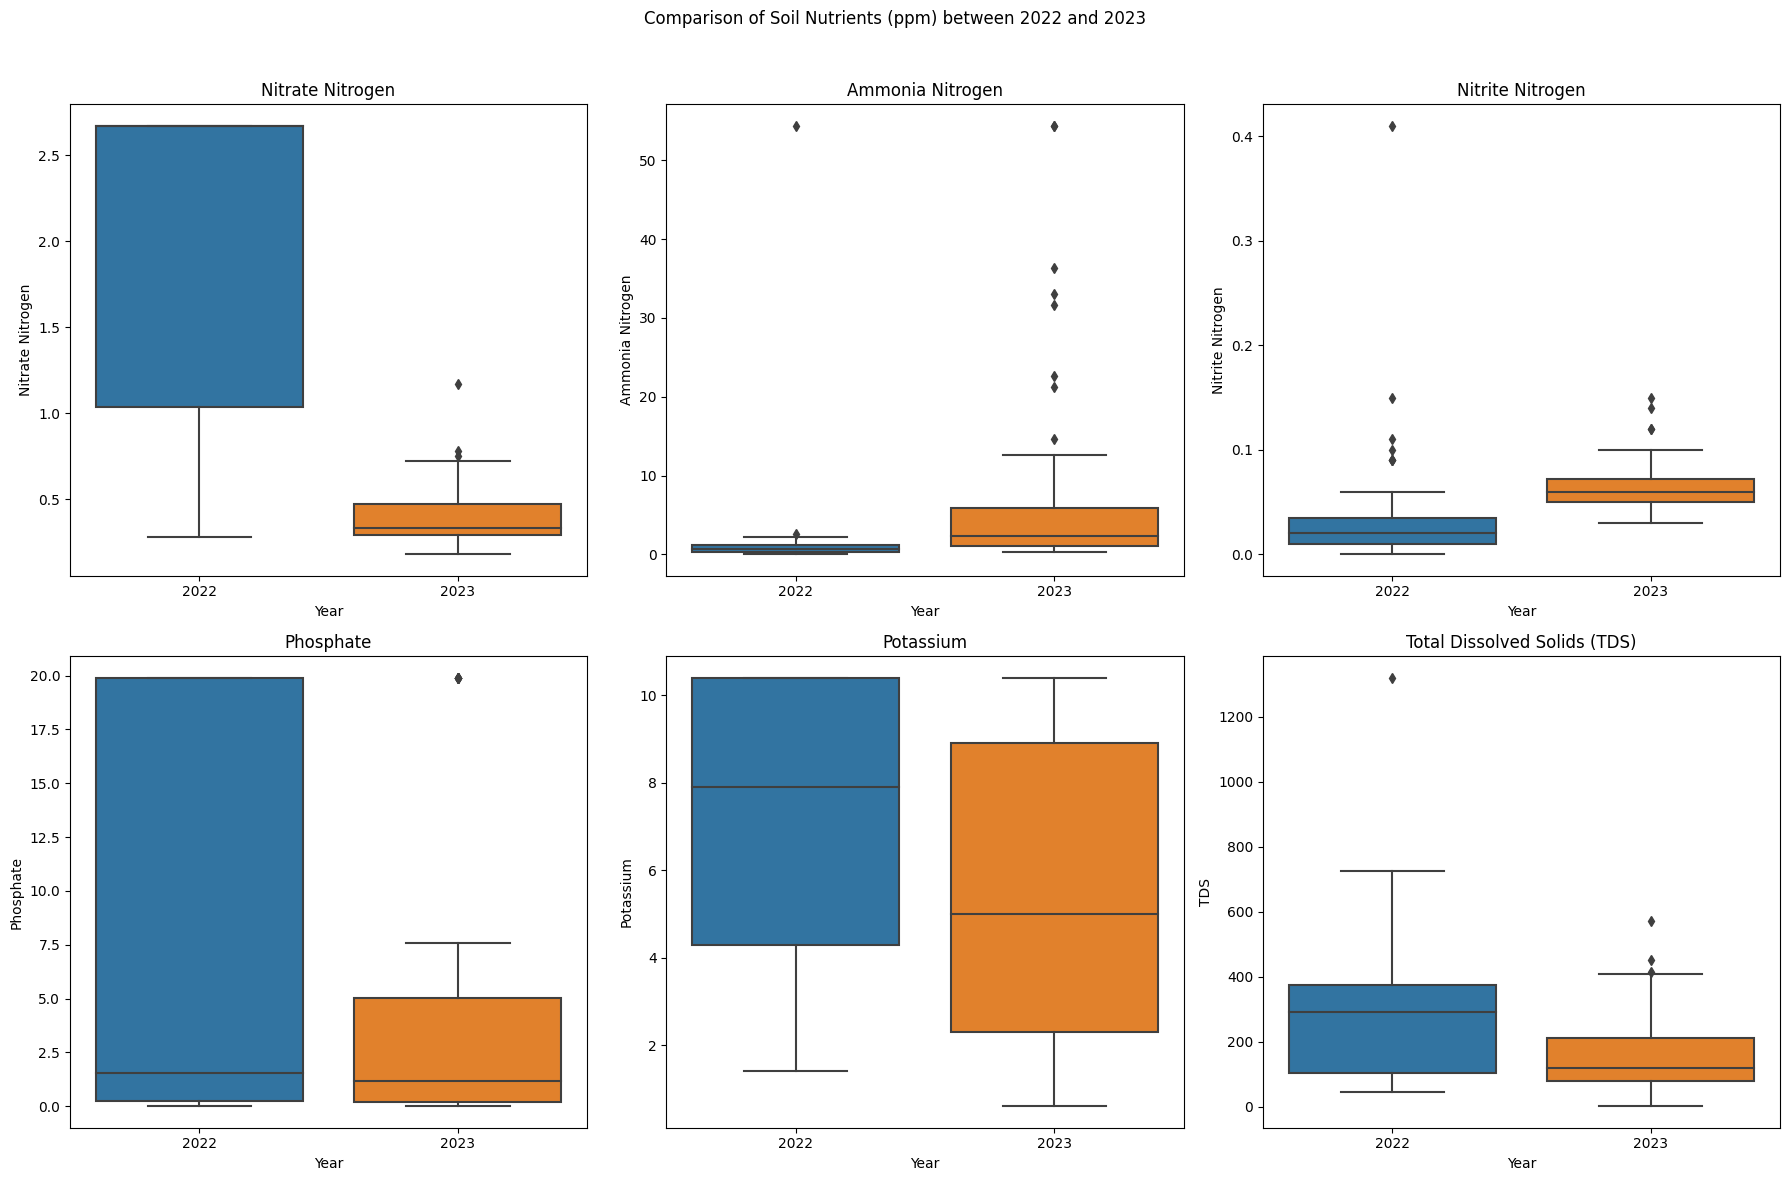

In [ ]:
# @title
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting soil nutrients by year to observe any changes or trends
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of Soil Nutrients (ppm) between 2022 and 2023')

sns.boxplot(x='Year', y='Nitrate Nitrogen', data=combined_data, ax=axs[0, 0])
axs[0, 0].set_title('Nitrate Nitrogen')

sns.boxplot(x='Year', y='Ammonia Nitrogen', data=combined_data, ax=axs[0, 1])
axs[0, 1].set_title('Ammonia Nitrogen')

sns.boxplot(x='Year', y='Nitrite Nitrogen', data=combined_data, ax=axs[0, 2])
axs[0, 2].set_title('Nitrite Nitrogen')

sns.boxplot(x='Year', y='Phosphate', data=combined_data, ax=axs[1, 0])
axs[1, 0].set_title('Phosphate')

sns.boxplot(x='Year', y='Potassium', data=combined_data, ax=axs[1, 1])
axs[1, 1].set_title('Potassium')

sns.boxplot(x='Year', y='TDS', data=combined_data, ax=axs[1, 2])
axs[1, 2].set_title('Total Dissolved Solids (TDS)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Comparison of Soil Nutrients between 2022 and 2023
The boxplots above provide a visual comparison of various soil nutrients and total dissolved solids (TDS) between the two years, considering the transition from wet to dry season in 2022 and from dry to wet season in 2023.

### Observations:
Nitrate Nitrogen: The distribution seems to be tighter in 2023 compared to 2022. This could suggest more consistent nitrate levels in the soil.

### Ammonia Nitrogen:
There seems to be a slight increase in the median level of ammonia nitrogen in 2023.

### Nitrite Nitrogen:
The levels appear to increase from 2022 to 2023. However, this was possibly because there were less data points in 2023

### Phosphate:
There is a notable reduction of phosphate levels in 2023, which were mostly "over-range" in 2022. This could suggest an improvement or change in phosphate availability.

### Potassium:
Similar to phosphate, potassium levels appear more consistently in 2023, which could indicate an improvement.

### Total Dissolved Solids (TDS):
The TDS levels appear to be slightly lower in 2023, which may be beneficial for plant growth as high TDS can be toxic.

### Nutrient Interactions and Plant Growth:
Nitrogen Compounds (Nitrate, Ammonia, Nitrite): These are essential for plant growth but can be detrimental in excess. They are involved in protein synthesis and other growth-related functions. Nitrogen is generally mobile in soil and its form can change depending on soil conditions such as pH and moisture.

### Phosphate:
Important for root development and flowering in plants. However, it is generally immobile in soil, making its availability crucial for plant health.

### Potassium:
Essential for various plant functions including water uptake and resistance to disease. It is relatively mobile in soil.

### Nutrient Transport and Mobility:
Mobile Nutrients: Nitrogen and potassium are generally mobile in soil, meaning they can easily move with water flow. This makes them more available to plants but also prone to leaching, especially in sandy soils.

### Immobile Nutrients:
Phosphorus is relatively immobile, meaning it doesn't easily move through the soil. This makes it less prone to leaching but also less available to plants.

### Seasonal Context:
The transition from wet to dry in 2022 and from dry to wet in 2023 can influence these nutrient levels. For example, nitrogen is more likely to leach during wet conditions, while phosphate may become more available as the soil moistens.

### Limitations:
Some values are "over-range", limiting the completeness of the data.
The seasonal differences between the two years can confound direct comparisons.

### Improvements:
More consistent data collection methods to avoid "over-range" values.
Conducting the study across multiple seasons for a more comprehensive view.

### Conclusions:
Overall, there seems to be an improvement or stabilization in nutrient levels from 2022 to 2023.
The seasonal context is crucial for interpreting these results, especially in a drought-prone area.

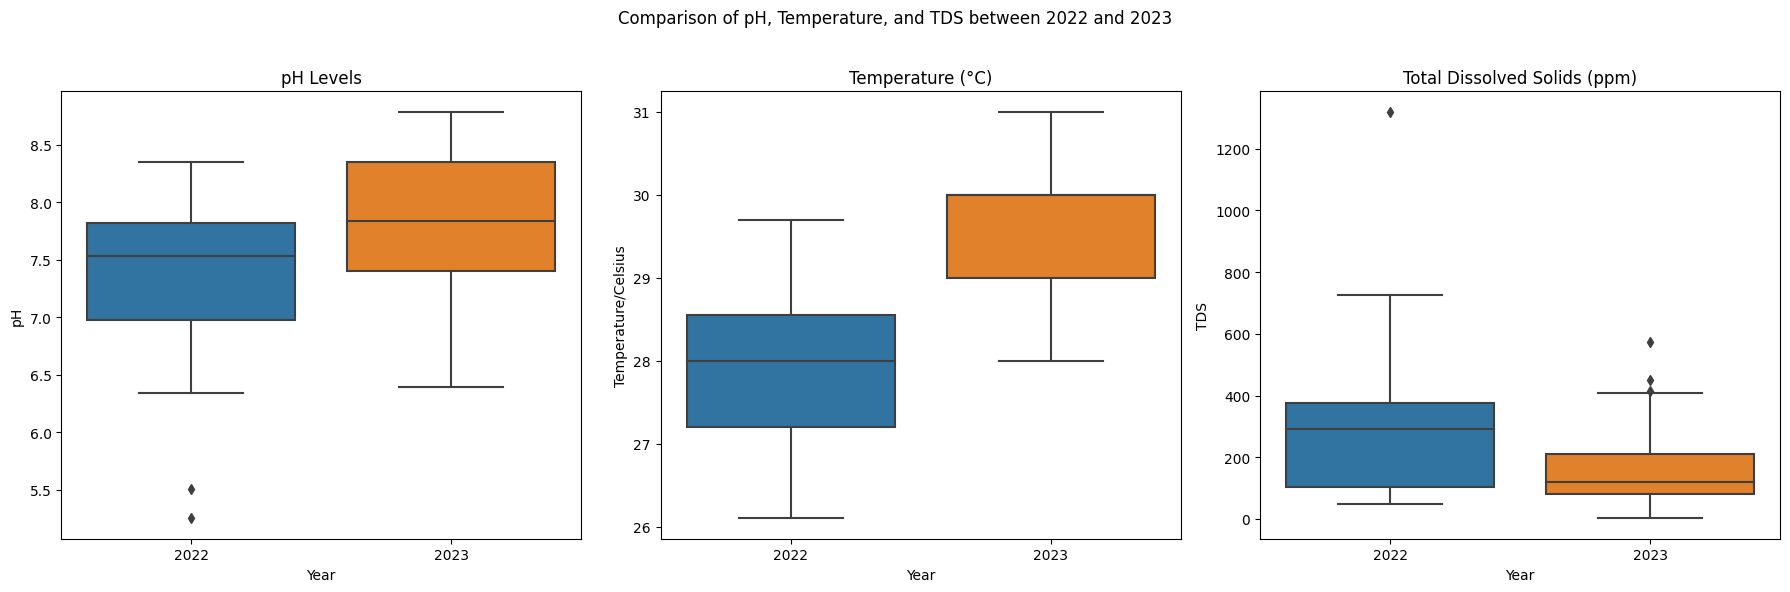

In [ ]:
# @title
# Plotting pH, Temperature, and TDS by year to observe any changes or trends
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparison of pH, Temperature, and TDS between 2022 and 2023')

sns.boxplot(x='Year', y='pH', data=combined_data, ax=axs[0])
axs[0].set_title('pH Levels')

sns.boxplot(x='Year', y='Temperature/Celsius', data=combined_data, ax=axs[1])
axs[1].set_title('Temperature (°C)')

sns.boxplot(x='Year', y='TDS', data=combined_data, ax=axs[2])
axs[2].set_title('Total Dissolved Solids (ppm)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Comparison of pH, Temperature, and TDS between 2022 and 2023
The boxplots above provide a comparison of pH, temperature, and total dissolved solids (TDS) between the two years, keeping in mind the transition from wet to dry season in 2022 and from dry to wet season in 2023.

### Observations:
### pH Levels:
The pH levels seem to be fairly consistent between the two years, with a slight increase in variability in 2023.
Importance: pH is crucial for nutrient availability. Many nutrients become less available as soil becomes too acidic or alkaline.
Seasonal Influence: Soil pH can fluctuate with moisture levels, often becoming more acidic during wet seasons due to leaching of basic ions.
Interactions: Soil pH can interact with nutrient forms. For instance, some forms of nitrogen are more available in slightly acidic soils.

### Temperature (°C):
The temperature appears to be higher in 2023, which aligns with the transition from the dry to the wet season.
Importance: Soil temperature affects microbial activity, root growth, and nutrient uptake.
Seasonal Influence: Higher temperatures can speed up organic matter decomposition, making nutrients more readily available but also susceptible to leaching.
Interactions: Temperature can influence water availability, which in turn impacts nutrient mobility.

### Total Dissolved Solids (TDS):
As mentioned earlier, the TDS levels appear to be slightly lower in 2023, which could be beneficial for plant growth.
Importance: High TDS can indicate poor water quality and may contain elements toxic to plants.
Seasonal Influence: TDS may decrease during wet seasons due to dilution and increase during dry spells due to evaporation.
Interactions: High TDS levels can hinder the uptake of essential nutrients by creating an ionic imbalance in the soil solution.

### Limitations:
The data points for each variable are not evenly distributed between the two years.
The seasonal context may affect direct comparisons.

### Improvements:
Collecting soil samples at the same seasonal points across years for more accurate comparisons.
Using more robust methods for measuring TDS to capture a fuller range of values.

### Conclusions:
The pH has remained relatively stable, which is good for nutrient availability.
The temperature seems to be higher in 2023, which could affect microbial activity and nutrient cycling.
TDS levels have somewhat improved, which may indicate better soil water quality for plant growth.

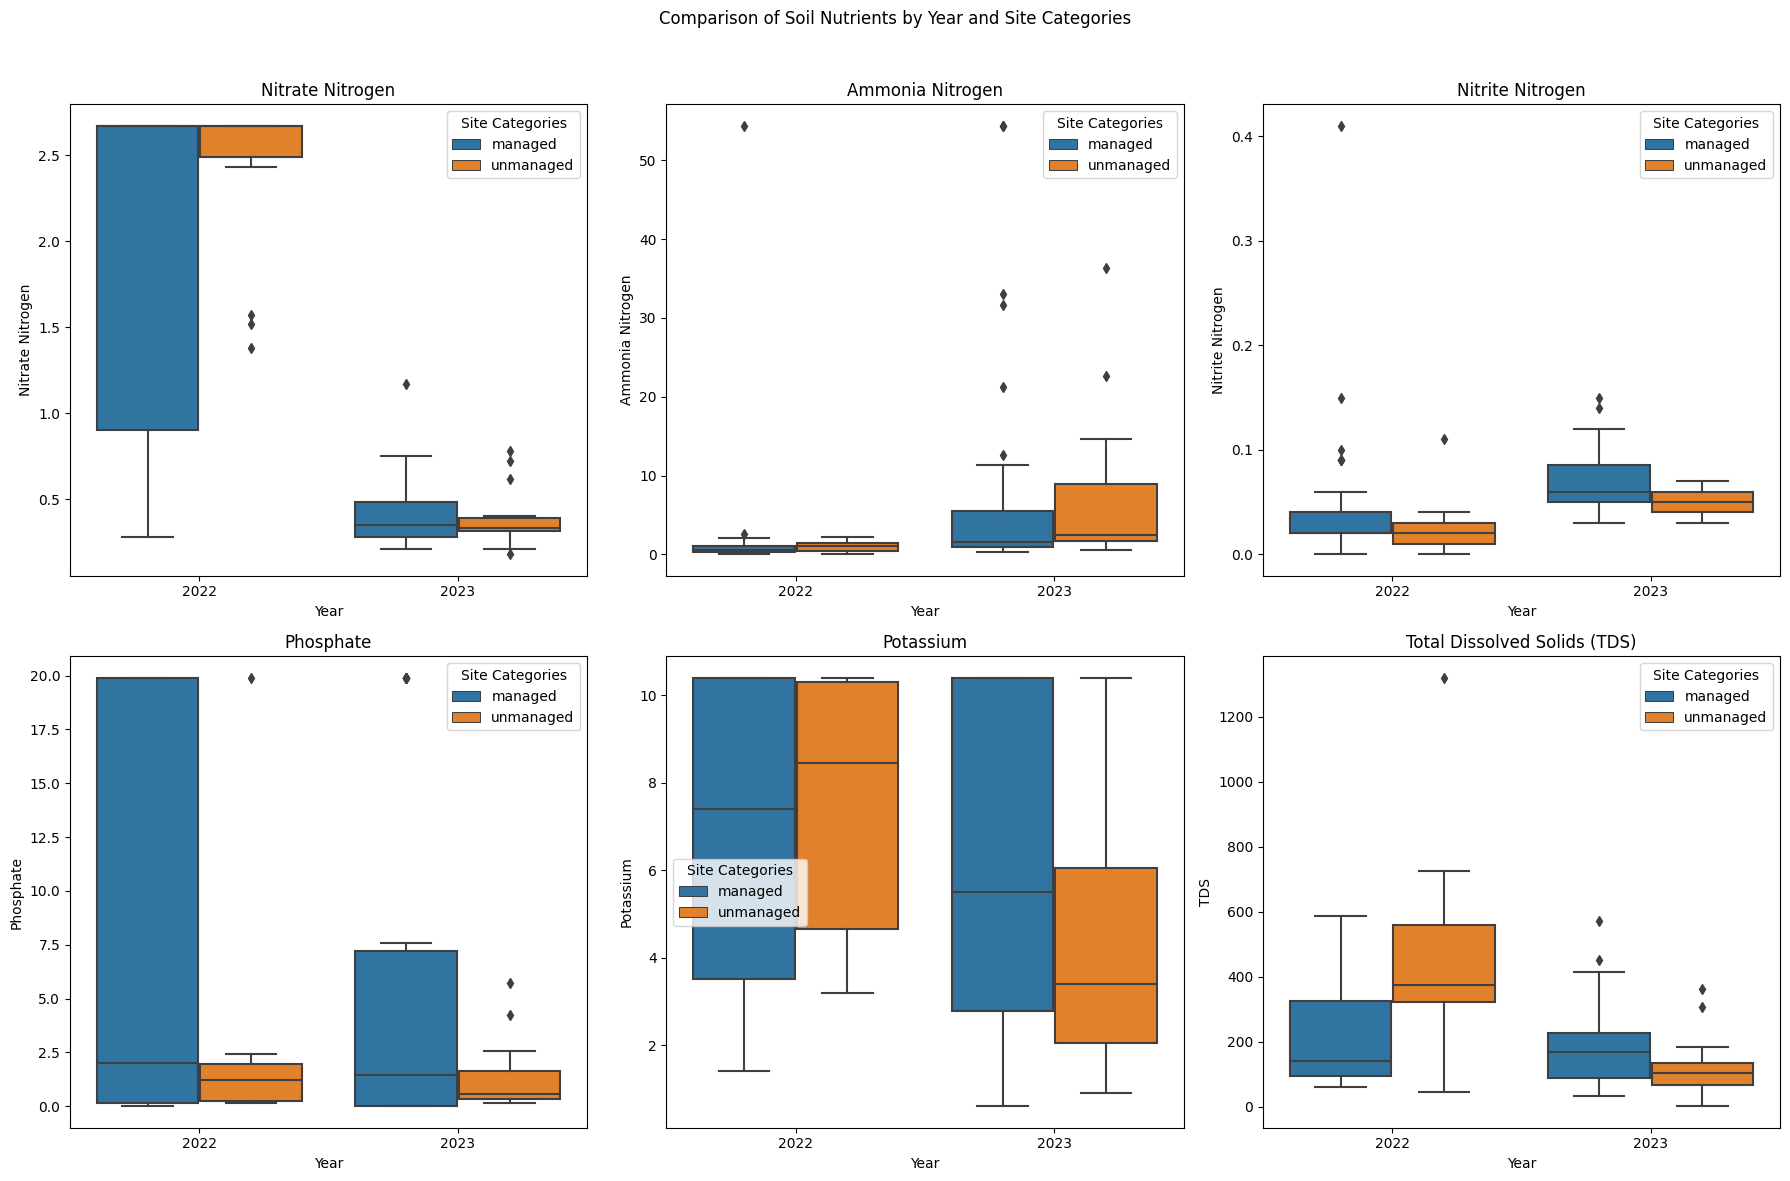

In [ ]:
# @title
# Plotting soil nutrients by year and site categories (managed vs unmanaged) to observe any changes or trends
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of Soil Nutrients by Year and Site Categories')

sns.boxplot(x='Year', y='Nitrate Nitrogen', hue='Site Categories', data=combined_data, ax=axs[0, 0])
axs[0, 0].set_title('Nitrate Nitrogen')

sns.boxplot(x='Year', y='Ammonia Nitrogen', hue='Site Categories', data=combined_data, ax=axs[0, 1])
axs[0, 1].set_title('Ammonia Nitrogen')

sns.boxplot(x='Year', y='Nitrite Nitrogen', hue='Site Categories', data=combined_data, ax=axs[0, 2])
axs[0, 2].set_title('Nitrite Nitrogen')

sns.boxplot(x='Year', y='Phosphate', hue='Site Categories', data=combined_data, ax=axs[1, 0])
axs[1, 0].set_title('Phosphate')

sns.boxplot(x='Year', y='Potassium', hue='Site Categories', data=combined_data, ax=axs[1, 1])
axs[1, 1].set_title('Potassium')

sns.boxplot(x='Year', y='TDS', hue='Site Categories', data=combined_data, ax=axs[1, 2])
axs[1, 2].set_title('Total Dissolved Solids (TDS)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Results: Comparison of Soil Nutrients by Year and Site Categories
The boxplots above delve deeper into the comparison of soil nutrients across the two years (2022 and 2023) and two site categories (managed and unmanaged).

Observations:
Nitrate Nitrogen: It appears that managed sites have a tighter distribution of nitrate levels in both years compared to unmanaged sites.

Ammonia Nitrogen: In both years, ammonia levels are higher in managed sites, possibly due to more intensive agricultural practices.

Nitrite Nitrogen: There's not much difference between managed and unmanaged sites in terms of nitrite levels in either year.

Phosphate: For 2023, managed sites show a range of phosphate levels, while data for unmanaged sites and for 2022 are largely 'over-range'.

Potassium: Data for potassium levels are mostly 'over-range' for 2022, but in 2023, managed sites display a spread of values.

Total Dissolved Solids (TDS): The TDS levels are lower in managed sites for 2023, suggesting better water quality management.

Deep Dive into Nutrients:
Nitrate Nitrogen:

Role: Essential for vegetative growth.
Seasonal Effects: More likely to leach during wet seasons.
Site Management: Managed sites likely use fertilizers, which could explain more consistent levels.
Ammonia Nitrogen:

Role: Important for protein synthesis in plants.
Seasonal Effects: Can volatilize in dry, hot conditions.
Site Management: Higher levels in managed sites may suggest use of ammonium-based fertilizers.
Nitrite Nitrogen:

Role: Generally a transitional form of nitrogen; not directly utilized by plants.
Seasonal Effects: Transformation into other forms is temperature and moisture-dependent.
Site Management: Not typically managed directly but can indicate soil health.
Phosphate:

Role: Crucial for root development and flowering.
Seasonal Effects: Less prone to leaching; may become more available as soil moistens.
Site Management: Phosphorus fertilizers are commonly used in managed sites.
Potassium:

Role: Important for water regulation in plants and disease resistance.
Seasonal Effects: Potassium is relatively mobile and may leach in wet conditions.
Site Management: Often added as part of balanced fertilizers in managed sites.
Total Dissolved Solids (TDS):

Role: High levels can be toxic to plants.
Seasonal Effects: Levels can vary based on rainfall and evaporation.
Site Management: Irrigation water quality is a key factor in managed sites.
Limitations:
The 'over-range' values limit the extent to which certain nutrients can be compared.
Conclusion:
Managed sites generally show more consistent nutrient levels, likely due to more intensive soil and water management practices.
Would you like to discuss any specific nutrient or aspect further?

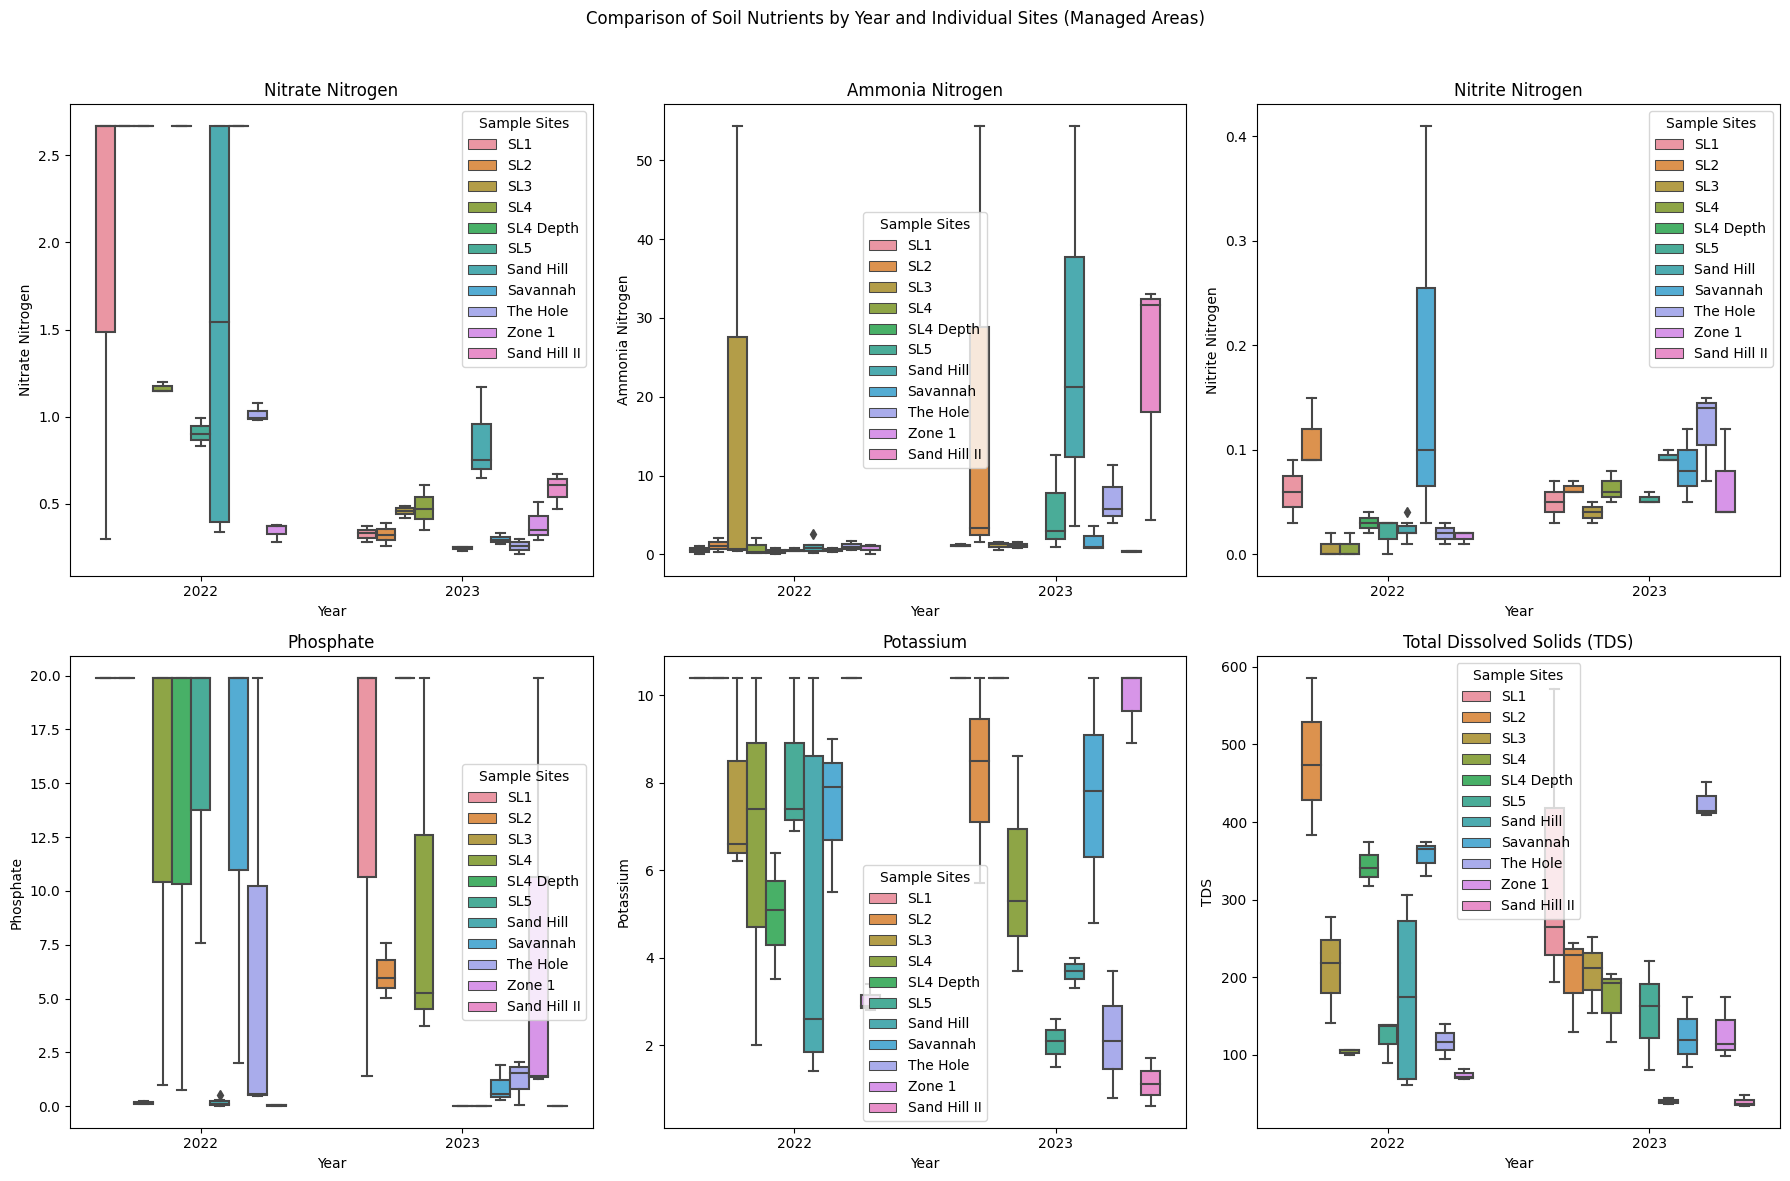

In [ ]:
# @title
# Filter the data to include only managed sites
managed_data = combined_data[combined_data['Site Categories'] == 'managed']

# Plotting soil nutrients by year and individual sites for managed areas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of Soil Nutrients by Year and Individual Sites (Managed Areas)')

sns.boxplot(x='Year', y='Nitrate Nitrogen', hue='Sample Sites', data=managed_data, ax=axs[0, 0])
axs[0, 0].set_title('Nitrate Nitrogen')

sns.boxplot(x='Year', y='Ammonia Nitrogen', hue='Sample Sites', data=managed_data, ax=axs[0, 1])
axs[0, 1].set_title('Ammonia Nitrogen')

sns.boxplot(x='Year', y='Nitrite Nitrogen', hue='Sample Sites', data=managed_data, ax=axs[0, 2])
axs[0, 2].set_title('Nitrite Nitrogen')

sns.boxplot(x='Year', y='Phosphate', hue='Sample Sites', data=managed_data, ax=axs[1, 0])
axs[1, 0].set_title('Phosphate')

sns.boxplot(x='Year', y='Potassium', hue='Sample Sites', data=managed_data, ax=axs[1, 1])
axs[1, 1].set_title('Potassium')

sns.boxplot(x='Year', y='TDS', hue='Sample Sites', data=managed_data, ax=axs[1, 2])
axs[1, 2].set_title('Total Dissolved Solids (TDS)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Comparison of Soil Nutrients by Year and Individual Sites (Managed Areas)
The boxplots above show a comparison of soil nutrients across the two years (2022 and 2023) and individual sites, focusing only on managed areas.

### Observations:
### Nitrate Nitrogen:
For Site SL1, nitrate levels appear to be more consistent in 2023.
Site SL2 shows a wide range of values in both years, indicating variability in nitrate content.
### Ammonia Nitrogen:
Both sites show a wide range of ammonia levels, although Site SL2 seems to have higher median values in 2023.
### Nitrite Nitrogen:
There doesn't seem to be much difference between the sites in terms of nitrite levels.
### Phosphate:
Data is mostly 'over-range' for Site SL1 in both years.
Site SL2 shows a range of phosphate levels in 2023.
### Potassium:
Site SL1 has most of its data as 'over-range' in both years.
Site SL2 shows a presence of potassium values in 2023.
### Total Dissolved Solids (TDS):
For Site SL1, TDS levels appear to have decreased in 2023.
Site SL2 also shows a decrease in TDS levels in 2023.

### Implications:
### Nitrate Nitrogen: The varying levels across sites could imply different fertilizer applications or soil management practices.

### Ammonia Nitrogen:
The higher levels, particularly in Site SL2, could be an indicator of more intensive agricultural activities, such as the use of ammonium-based fertilizers.

### Phosphate and Potassium:
The limited data due to 'over-range' values make it challenging to draw concrete conclusions for these nutrients. However, the presence of these nutrients in Site SL2 in 2023 could indicate an improvement in soil fertility.

### TDS:
The decrease in TDS levels in 2023 for both sites could suggest better water quality management, which is critical in a drought-prone area.

### Limitations:
The presence of 'over-range' values in the data limits the depth of the analysis.

### Conclusion:
While there is variability across sites, there generally seems to be a trend of more stable or improved nutrient levels in 2023 compared to 2022 in these managed areas.

In [ ]:
# @title
# Identify numerical columns in the DataFrame
# Exclude columns like 'Year', which although numerical, are categorical in nature
numerical_columns = combined_data.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Year')

# Group the DataFrame by 'Sample Sites' and 'Year', and calculate the mean for each group
mean_by_site_year = combined_data.groupby(['Sample Sites', 'Year'])[numerical_columns].mean().reset_index()

# Display the first few rows of the mean_by_site_year DataFrame
mean_by_site_year.head(), numerical_columns

combined_data['Sample Sites'].unique()


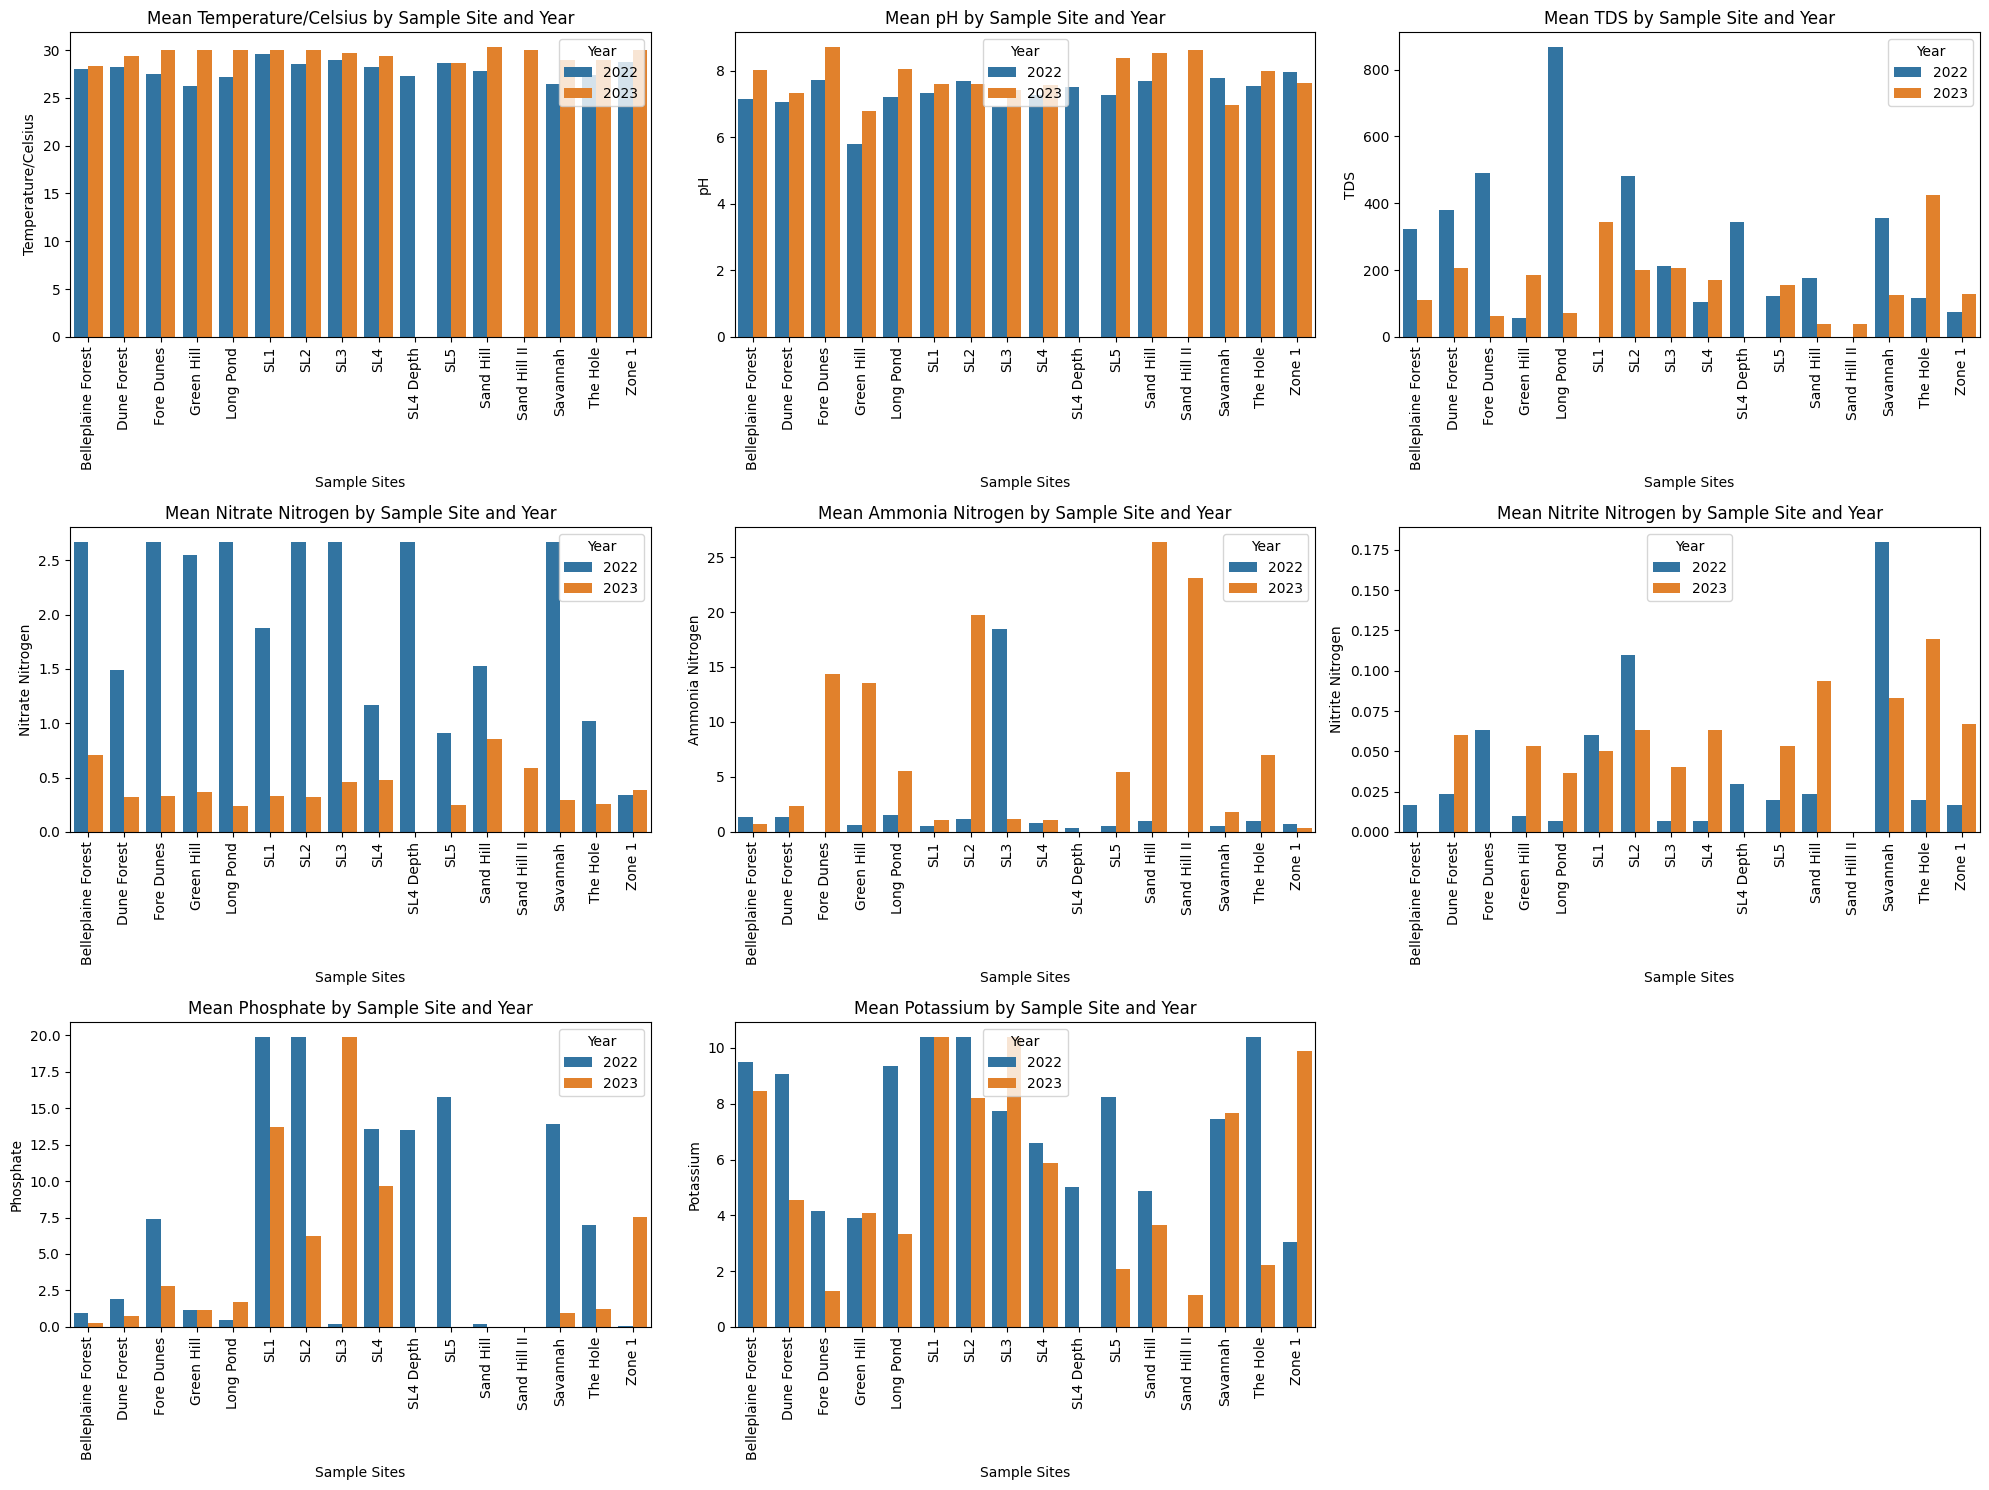

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with adjusted x-axis labels
plt.figure(figsize=(20, 15))

# Loop through numerical columns to generate bar charts
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x='Sample Sites', y=col, hue='Year', data=mean_by_site_year)
    plt.title(f'Mean {col} by Sample Site and Year')
    plt.xticks(rotation=90, fontsize=10)  # Adjust the fontsize here
    plt.tight_layout()

plt.show()


In [ ]:
import numpy as np

# Calculate the standard deviation and sample size for each group
std_by_site_year = combined_data.groupby(['Sample Sites', 'Year'])[numerical_columns].std().reset_index()
count_by_site_year = combined_data.groupby(['Sample Sites', 'Year'])[numerical_columns].count().reset_index()

# Calculate the standard error of the mean (SEM)
sem_by_site_year = std_by_site_year.copy()
for col in numerical_columns:
    sem_by_site_year[col] = std_by_site_year[col] / np.sqrt(count_by_site_year[col])

# Display the first few rows of the SEM DataFrame
sem_by_site_year.head()




,Sample Sites,Year,Temperature/Celsius,pH,TDS,Nitrate Nitrogen,Ammonia Nitrogen,Nitrite Nitrogen,Phosphate,Potassium
0,Belleplaine Forest,2022,0.200000,0.381765,1.405149,0.000000,0.130937,0.008819,0.465988,0.709460
1,Belleplaine Forest,2023,0.333333,0.056075,8.769745,0.046667,0.115662,NaN,0.044845,1.097472
2,Dune Forest,2022,0.305505,0.788761,9.550393,0.056862,0.550192,0.003333,0.269506,1.333333
3,Dune Forest,2023,0.333333,0.549586,80.155606,0.003333,0.304430,0.005774,0.249689,1.169520
4,Fore Dunes,2022,0.145297,0.410745,74.677261,0.000000,0.023333,0.023333,6.273015,0.328295


### Discussion of Means and Bar Charts

#### General Observations:

1. **Temperature/Celsius**: The temperature seems to vary slightly across different sample sites but stays relatively constant within a range of 27-30°C. Some sites like 'Long Pond' and 'Green Hill' show a noticeable change between 2022 and 2023.

2. **pH**: There is some variation in pH across sites, with most ranging between 6 and 8.5. 'Belleplaine Forest' shows a significant increase in pH from 2022 to 2023.

3. **TDS (Total Dissolved Solids)**: There is a wide range of TDS levels across sites. Some sites like 'The Hole' and 'Zone 1' have significantly high TDS levels compared to others.

4. **Nutrients (Nitrate Nitrogen, Ammonia Nitrogen, Nitrite Nitrogen, Phosphate)**: The concentration of nutrients varies quite a bit across sites, indicating different levels of nutrient inputs and possibly different ecosystem functions.

5. **Potassium**: The potassium levels vary across sites but are generally around the range of 4-10 units.

#### Limitations:

1. **Missing Data**: Some bars are missing, particularly for 'Nitrite Nitrogen' in 2023 for 'Belleplaine Forest'. This could be due to missing or inconsistent data collection.

2. **Variability**: The means may not capture the full variability of each site. Extreme values or outliers can affect the mean, and other statistical measures like median or standard deviation might provide a more complete picture.

3. **Temporal Scale**: The data only covers two years, so it's challenging to make long-term assessments or identify trends.

4. **Site-Specific Factors**: The bar charts don't account for site-specific factors like soil type, vegetation cover, or human activity


### Trends Between Managed and Unmanaged Sites

#### Observations:

1. **Temperature/Celsius**: Both managed and unmanaged sites have similar temperature ranges. However, some unmanaged sites like 'Long Pond' and 'Green Hill' exhibit a noticeable change between 2022 and 2023.

2. **pH**: Managed sites generally have a pH closer to neutral (around 7), whereas unmanaged sites like 'Long Pond' and 'Green Hill' show more acidic or alkaline conditions.

3. **TDS (Total Dissolved Solids)**: Managed sites like 'SL1' and 'SL2' have relatively lower TDS levels compared to unmanaged sites such as 'The Hole' and 'Zone 1'.

4. **Nutrients**: Nutrient levels seem to be higher in some managed sites like 'SL1' and 'SL2', especially for Nitrate Nitrogen and Phosphate. This could be due to fertilization practices.

5. **Potassium**: Managed sites generally have higher levels of potassium compared to unmanaged sites, which may be related to soil management practices.

#### Limitations:

1. **Sample Size**: The number of managed and unmanaged sites may not be balanced, affecting the validity of comparisons.

2. **Environmental Factors**: Other unmeasured factors such as rainfall, soil type, and human activity could also be influencing these trends.

## Note: Seasonal Effects and Their Confounding Impact on Results

What is a Confounding Variable?
A confounding variable is an extraneous factor that correlates with both the dependent and independent variables, making it difficult to isolate the effect of the independent variable on the dependent one. In the context of this soil analysis, the season during which the data was collected acts as a confounding variable.

Seasonal Effects on Soil Nutrients and Conditions:
Nutrient Availability: Nutrients like nitrogen are more susceptible to leaching during wet seasons, reducing their availability in the soil. Conversely, in dry seasons, nutrients may accumulate but become less available for plant uptake due to low moisture content.

Soil pH: As discussed, soil pH can fluctuate with moisture levels. For example, it often becomes more acidic during wet seasons due to the leaching of basic ions.

Soil Temperature: Wet seasons may lead to cooler soil temperatures, affecting microbial activity and slowing down nutrient cycling. In contrast, dry seasons with higher temperatures can speed up these processes.

Total Dissolved Solids (TDS): During the wet season, higher rainfall can dilute the soil solution, potentially reducing TDS levels. In the dry season, evaporation can concentrate dissolved solids, increasing TDS levels.

Why Seasonal Effects Confound the Results:
Inconsistent Comparison: Since the 2022 data was collected during the transition from wet to dry, and the 2023 data was collected from dry to wet, we are essentially comparing apples to oranges. Soil conditions are different in these two periods, affecting nutrient levels and other variables.

Masking True Trends: Any observed changes in nutrient levels or other variables could be the result of seasonal changes rather than any soil management practices or natural processes affecting soil health.

Interactions Between Variables: Seasonal changes often cause multiple soil variables to change simultaneously. For example, increased rainfall could lead to both lower TDS and changes in nutrient forms, making it difficult to attribute changes in plant growth or soil health to any single factor.

Variable Variability: Seasonal changes can introduce more variability into soil conditions. This could make it harder to detect significant trends or changes over the years, requiring more complex statistical analyses to tease apart the effects of interest.

Recommendations:
Control for Seasonality: Ideally, data should be collected at the same seasonal points across different years to make the comparison more valid.

Statistical Adjustment: Advanced statistical models can sometimes account for seasonality, but these require data on how each variable changes with the seasons, which might not be available.

Contextual Interpretation: If controlling for seasonality is not possible, it becomes crucial to interpret the results in the context of the seasonal changes. Essentially, one should be cautious about making broad claims based on the observed data.

By understanding these seasonal effects and their confounding impact, we can better interpret the data and draw more accurate conclusions. Would you like to explore more on this topic?

# A True Baseline Measurement

To truly understand the power of the regeneratoin efforts at Walkers a true baseline would have to be established, where, almost immediately after mining the site was tested for soil quality and as the stages of regeneration continued, soil quality and soil physical variables were measured, such as the current nutrient analysis + Organica Matter Content, Total Organic Carbon, Microbial Activity and other indicators of regenerated soils (soil texture, bulk density, and water-holding capacity, CEC etc.)